## Asset Allocation - Small example

In [1]:
import optable

In [2]:
# set up the quadratic program
c = [0, 0, 0]
covariance = \
      [[.00716,      0,     0],
       [.00158, .00341,     0],
       [.00200, .00137, .0040]]
returns = [.031, .014, .012]
A = [[1,1,1], # portfolio weights sum to 1
     returns] # average return of the portfolio
sense = ['=', '>=']
b = [1, min(returns)] # RHS for model
x0 = [.4, .3, .3] # starting weights for the algorithm (need guesses)

In [3]:
# trace the efficient frontier by sampling a few minimum required returns
rstart = min(returns)
rend = max(returns)
rincr = (rend-rstart)/10 # run 10 scenarios
r = rstart
returns = [] # keep track of the returns for each scenario
risks = [] # keep track of the risks
while r <= rend:
    qp = optable.QpModel('min', c, covariance, A, sense, b, x0)
    result = qp.solve()
    #print(r, result.fun)
    returns.append(r)
    risks.append(result.fun)
    r += rincr
    b[1] = r # move up required return floor for next run

In [4]:
# display the risks/returns (above the minimum risk level)
import pandas as pd
df = pd.DataFrame({"return":returns, "risk":risks})
df['return'] = df['return'] * 100 # convert from decimal to %
# trim lowest risk level
df2 = df[df.risk > df.risk.min()]
df2

,return,risk
3,1.77,0.002022
4,1.96,0.002255
5,2.15,0.002648
6,2.34,0.003202
7,2.53,0.003922
8,2.72,0.004810
9,2.91,0.005864
10,3.10,0.007160


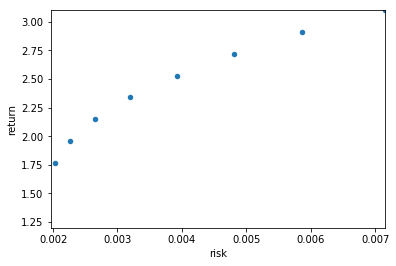

In [5]:
%matplotlib inline
xbuffer=.0
ybuffer=.0
df2.plot.scatter(x='risk', y='return', 
                 xlim=[min(risks),max(risks)],
                 ylim=[min(returns)*100, max(returns)*100])